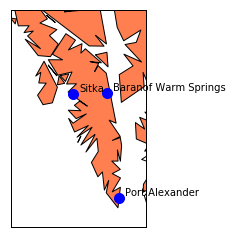

In [14]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
my_map = Basemap(projection='merc', lat_0=57, lon_0=-135,
              resolution='l', area_thresh=.1,
                 llcrnrlon=-136.25, llcrnrlat=56,
                urcrnrlon=-134.25, urcrnrlat=57.75)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='coral')
my_map.drawmapboundary()
 
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))

lons = data_long
lats = data_lat
x,y = my_map(lons, lats)
my_map.plot(x, y, 'bo', markersize=10)

labels = ['Sitka', 'Baranof Warm Springs', 'Port Alexander']
for label, xpt, ypt in zip(labels, x, y):
    plt.text(xpt+10000, ypt+5000, label)

    
plt.show()

In [40]:
import pandas as pd

#data = pd.read_csv('Airbnb.csv','r')
data = pd.read_csv('Airbnb.csv', error_bad_lines=False, index_col=False)
col_list = data.columns
print(len(col_list))
data = data[col_list[1:20]]  ##drop first column
data.head(10)
#data.info()
#data.columns

data_long = list(data['longitude'])
data_lat = list(data['latitude'])

21


In [43]:
len(data_long)
len(data_lat)
data.head(10)

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude
0,17321187,1178,111461255,Private room,NaN,Houston,NaN,SHARPSTOWN,2,NaN,2,1.0,NaN,23.0,NaN,Fully Furnished Private Room,2017-04-30 21:49:10.778785,29.704299,-95.544285
1,16894576,1178,15675301,Private room,NaN,Houston,NaN,SPRING BRANCH CENTRAL,1,NaN,2,1.0,NaN,29.0,NaN,Modern Home in Spring Branch,2017-04-30 21:49:11.001093,29.813008,-95.510741
2,15754139,1178,24778788,Private room,NaN,Houston,NaN,GREATER UPTOWN,0,NaN,1,1.0,NaN,36.0,NaN,"Private Room, Galleria Townhouse!",2017-04-30 21:49:11.330773,29.741633,-95.496907
3,17684888,1178,113285220,Private room,NaN,Houston,NaN,ASTRODOME AREA,0,NaN,2,1.0,NaN,28.0,NaN,Private room in med center close to rodeo,2017-04-30 21:49:12.246608,29.693915,-95.390413
4,18343228,1178,52947407,Private room,NaN,Houston,NaN,MIDTOWN,0,NaN,2,1.0,NaN,37.0,NaN,Quiet Bedroom in Great Location! Midtown/Montrose,2017-04-30 21:49:12.482888,29.741089,-95.367900
5,18060306,1178,38569220,Private room,NaN,Houston,NaN,WASHINGTON AVENUE COALITION / MEMORIAL PARK,2,NaN,2,1.0,NaN,35.0,NaN,Private Bed & Bath in Washington/Heights Townh...,2017-04-30 21:49:15.065129,29.779132,-95.406138
6,12129971,1178,64458416,Private room,NaN,Houston,NaN,SPRING BRANCH NORTH,0,NaN,1,1.0,NaN,35.0,NaN,Beautiful garden home near Gallaria room 2,2017-04-30 21:51:31.644263,29.810338,-95.529329
7,15924652,1178,21770756,Private room,NaN,Houston,NaN,GREATER HEIGHTS,1,NaN,2,1.0,NaN,40.0,NaN,Private room in the heights,2017-04-30 21:51:32.445232,29.800008,-95.399512
8,17044148,1178,114363845,Private room,NaN,Houston,NaN,MEMORIAL,0,NaN,1,1.0,NaN,39.0,NaN,Vacant bedroom upstairs,2017-04-30 21:51:35.530775,29.768298,-95.579722
9,13432002,1178,55957875,Private room,NaN,Houston,NaN,CENTRAL NORTHWEST,0,NaN,2,1.0,NaN,35.0,NaN,Cozy Oak Forest Homestay,2017-04-30 21:51:40.356227,29.844288,-95.476443


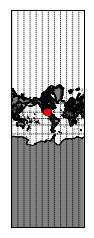

In [108]:
##map of data
eq_map = Basemap(projection='merc', resolution = 'l', area_thresh = .1,
              lat_0=29.76, lon_0=-95.36,
               width=1.0E6, height=1.2E6) #upper right
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'gray')
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))
 
x,y = eq_map(data_long, data_lat)
eq_map.plot(x, y, 'ro', markersize=6)
 
plt.show()

<Figure size 432x288 with 0 Axes>

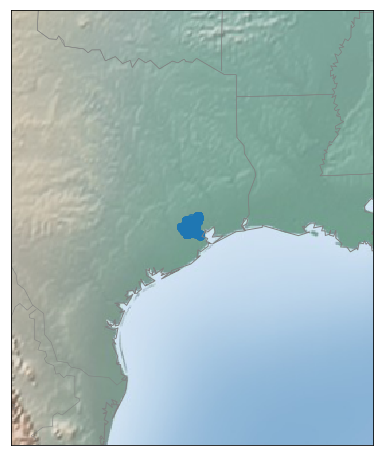

In [113]:
## Plot in Texas
plt.clf()
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='l', 
            lat_0=29.76, lon_0=-95.36,
            width=1.0E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

m.scatter(data_long, data_lat, latlon=True,
          cmap='Reds', alpha=0.5)


#c=np.log10(population)
#s=area
plt.show()

<Figure size 432x288 with 0 Axes>

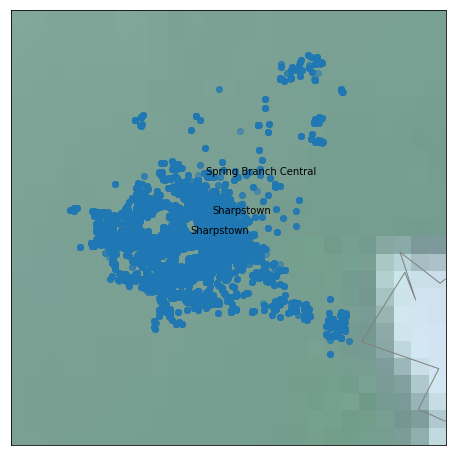

In [126]:
#Zoom in on Houston
plt.clf()
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='l', 
            lat_0=29.76, lon_0=-95.36,
            width=.09E6, height=.09E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
x,y = m(data_long, data_lat)
m.scatter(data_long, data_lat, latlon=True,
          cmap='Reds', alpha=0.5)

labels = ['Sharpstown', 'Spring Branch Central', 'Sharpstown']
for label, xpt, ypt in zip(labels, x, y):
    plt.text(xpt+10000, ypt+5000, label)

#c=np.log10(population)
#s=area
plt.show()

87

In [223]:
import numpy as np

data_long_np = np.array(data_long)
data_lat_np = np.array(data_lat)
neighborhood = list(data['neighborhood'])
#np.take(a, indices)
neighborhood_np = list(set(neighborhood))
type(neighborhood_np)
neighborhood_np
indices = [3,4,5] ##need to fill this
rn = np.take(neighborhood_np, indices)
neighborhood
new_list2

[('WASHINGTON AVENUE COALITION / MEMORIAL PARK', 2560),
 ('GREATER HEIGHTS', 2198),
 ('ASTRODOME AREA', 2176),
 ('NEARTOWN - MONTROSE', 2151),
 ('GREATER UPTOWN', 1647),
 ('MIDTOWN', 1376),
 ('DOWNTOWN', 1324),
 ('BRAESWOOD', 1205),
 ('SOUTH MAIN', 1066),
 ('GREENWAY / UPPER KIRBY AREA', 914),
 ('MACGREGOR', 898),
 ('UNIVERSITY PLACE', 728),
 ('MID WEST', 679),
 ('CENTRAL SOUTHWEST', 618),
 ('AFTON OAKS / RIVER OAKS AREA', 576),
 ('ELDRIDGE / WEST OAKS', 569),
 ('SECOND WARD', 483),
 ('GREATER THIRD WARD', 478),
 ('FOURTH WARD', 469),
 ('WILLOW MEADOWS / WILLOWBEND AREA', 450),
 ('NEAR NORTHSIDE', 437),
 ('MEMORIAL', 411),
 ('CENTRAL NORTHWEST', 386),
 ('MEYERLAND AREA', 380),
 ('MUSEUM PARK', 357),
 ('WESTCHASE', 356),
 ('GREATER EASTWOOD', 351),
 ('SHARPSTOWN', 334),
 ('WESTBURY', 333),
 ('GREATER OST / SOUTH UNION', 321),
 ('MEDICAL CENTER AREA', 315),
 ('BRAYS OAKS', 304),
 ('BRIAR FOREST', 289),
 ('SPRING BRANCH WEST', 272),
 ('LAZYBROOK / TIMBERGROVE', 240),
 ('GREATER FIFTH WARD

In [165]:
list_indices = []
for n in neighborhood_np:
    list_indices.append(neighborhood.index(n))
    
#print(len(list_indices))
#print(len(neighborhood_np))


long_plot = np.take(data_long, list_indices)
lat_plot = np.take(data_lat, list_indices)
len(long_plot)

87

<Figure size 432x288 with 0 Axes>

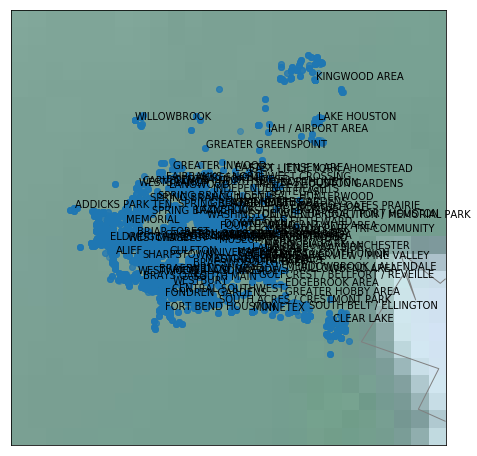

In [169]:
#Zoom in on Houston
plt.clf()
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='l', 
            lat_0=29.76, lon_0=-95.36,
            width=.09E6, height=.09E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
x,y = m(long_plot, lat_plot)
m.scatter(data_long, data_lat, latlon=True,
          cmap='Reds', alpha=0.5)

labels = neighborhood_np
for label, xpt, ypt in zip(labels, x, y):
    plt.text(xpt+100, ypt+50, label)

#c=np.log10(population)
#s=area
plt.show()

In [242]:
## subset for the top neighborhoods##
from collections import Counter
#neighborhood_np
freqs = Counter(data['neighborhood'])
freqs
#new_list = sorted(freqs,freqs. reverse=True)
new_list = sorted(freqs, key=freqs.get, reverse=True)
new_list2 = freqs.most_common()

custom_list = ['WASHINGTON AVENUE COALITION / MEMORIAL PARK',
'GREATER HEIGHTS',
'ASTRODOME AREA',
'CLEAR LAKE',
'KINGWOOD AREA',
'IAH / AIRPORT AREA',
'FORT BEND HOUSTON',
'ALIEF',
'GREATER HOBBY AREA',
'WILLOWBROOK','MIDTOWN','DOWNTOWN', 'UNIVERSITY PLACE', 'SPRING BRANCH NORTH','GREATER UPTOWN','MEMORIAL','SHARPSTOWN']
most_15common = new_list[:10]

list_indices = []
for n in custom_list:
    list_indices.append(neighborhood.index(n))
    
print(len(list_indices))
print(len(custom_list))


long_plot = np.take(data_long, list_indices)
lat_plot = np.take(data_lat, list_indices)
len(long_plot)

price = list(data['price'])




17
17


<Figure size 432x288 with 0 Axes>

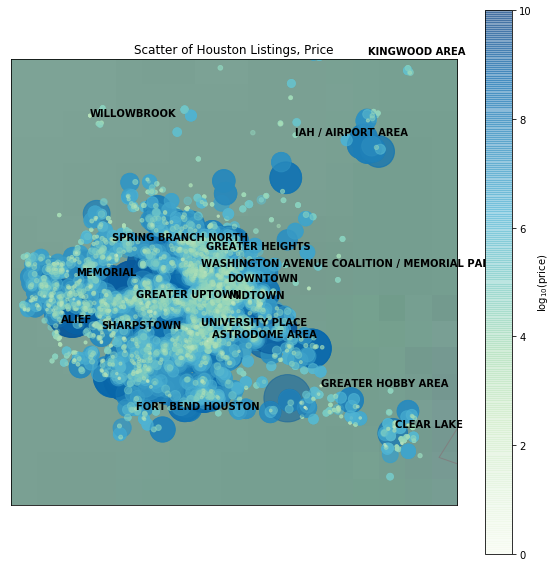

In [294]:
plt.clf()
fig = plt.figure(figsize=(10, 10))
m = Basemap(projection='lcc', resolution='l', 
            lat_0=29.76, lon_0=-95.36,
            width=.06E6, height=.06E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
x,y = m(long_plot, lat_plot)
m.scatter(data_long, data_lat, latlon=True,
          cmap='GnBu', alpha=0.5, c=np.log(price), s=price, marker=".")

labels = custom_list
for label, xpt, ypt in zip(labels, x, y):
    plt.text(xpt+10, ypt+5, label,fontweight='bold')

plt.colorbar(label=r'$\log_{10}({\rm price})$')
plt.clim(0, 10)
plt.title("Scatter of Houston Listings, Price")

#c=np.log10(population)
#s=area
#fontweight='bold'
plt.show()